# 1. What ML Models Do We Leverage?
## 1-1. Facebook Machine Learning Model
    - SVM / GBDT / MLP / CNN / RNN
        - Deeplearning Model : MLP / CNN / RNN
        - SVM : Deeplearning 등장 이전에 썼던 Model
        - GBDT : Gradient Boosting, Decision Tree
            - GBDT는 다른 4개에 비해 성질이 다르다.
            - 나머지 모델은 흔히 Parametric Model(모수적 모델)
                - 모델의 성질 자체가 몇 개의 Parameter들의 값에 의해서 결정된다는 점에서 4개를 Parametric Model이라고 한다.
            - GBDT
                - Nonparametric Model
                - 몇 개의 parameter를 조정하는 걸로 얻을 수 없다.

## 1-2. GBDT를 배우는 이유는?
    - (SVM을 제외하고) Deeplearning 모델과 GBDT는 많이 쓰인다.
    - 둘이 쓰이는 데이터의 종류가 다르다.
    - Decision Tree에 기반한 모델들은 구조화된 데이터에 대해 잘 접근한다.

### 1-2-1. 구조화된 데이터
    - Model : GBDT(Gradient Boost / Decision Tree)
    - Data : 엑셀에 저장된 형태의 데이터

### 1-2-2. 구조화되지 않은 데이터
    - Model : MLP / CNN / RNN
    - Data : 텍스트, 음성, 영상 데이터
    - 구조화되지 않은 데이터를 처리하기 위해서는 어마어마한 양의 모델 Capacity가 필요하다
    - 사실 컴퓨터가 인식하는 이미지는, 숫자들의 덩어리(픽셀)이다.
    - 20*20 pixel 이라고 하면, 컴퓨터가 인식하는 숫자는 400개(흑백), 1200개(RGB)
    - 이미지를 처리한다는 건, 숫자 1200개를 받아서 이미지에 뭐가 들었는지 컴퓨터가 반환해주는 것
    - 개별 픽셀 하나하나가 얼마나 밝은지 어두운지가 그 사진에 들어 있는 객체가 고양이인지 강아지인지 얘기해주지 않는다.
    - 그렇기 때문에 복잡한 관계(어디가 어떻게 밝은지에 따라서)를, 그러니까 픽셀의 세기와 실제로 사진에 들어 있는 객체의 종류가 무엇인지
    - 완전히 연관 없어 보이는 그 둘의 input과 output을 하나로 엮는 모델을 만들기 위해서 어마어마한 양의 Model Capacity가 필요하다.
    - 그래서 오른쪽 3개의 딥러닝 모델을 쓰는 것이다.

    - 그런데 구조화된 데이터, 구조화된 데이터는 대부분 역학 관계의 구조가 복잡하지 않다.
    - 그래서 상대적으로 간단한 모델링을 할 때는 굳이 딥러닝 모델을 쓸 필요가 없다. 닭 잡는데 소잡는 칼을 쓸 필요가 없다.
    - GBDT(Gradient Boost, Decision Tree)는 닭 잡는 칼

- - -

# 2. Wine Data
    - obj : 와인의 정보들을 가지고 Quality를 예측하고 싶다.
        - Quality를 예측하면 좋은점
            - 와인의 Quality를 직접 측정하지 않고, 와인의 정보들만 가지고, 와인의 질을 측정하는 모델을 만들 수 있다.
            - 그 말인즉슨, 소믈리에를 고용하지 않고 Quality를 측정할 수 있다는 뜻이다.

## 2-1. 중요한 것
    - 와인 데이터이지만, 실은 우리가 다루는 데이터가 무슨 데이터인지는 중요하지 않다.
    - 만약에 이 데이터가 내가 다루는 데이터라면 Input은 뭐였으면 좋겠고,
    - Output이 뭐였으면 좋겠는지를 계속 염두에두고 데이터를 다루는 게 도움이 된다.
    
## 2-2. Test_set과 Train_set
    - Test_set
        - Output(Quality)은 다 비어있다.
        
    - Train_set
        - output(Quality)이 다 들어있다.
        
        - 1) Train_set을 가지고 Model을 만들어서
        - 2) Test_set에 있는 Input을 (Train_set을 가지고 만든)Model에 넣어서 궁극적으로 Quality를 예측하는 것이다.
        - Train_set을 가지고 모델을 만들어서 Test_set에 있는 Input을 다시 넣어서 Quality를 예측했을 때,
        - 그 Quality가 얼마나 좋을지, 얼마나 틀릴지 이런 걸 정량적으로 얘기할 수 있을까?
        - 없다. 그래서 Data를 2개 혹은 3개로 쪼갠다.
        
    - Train_Set을 다시 한 번 (Train / Validation / Test) 로 3등분 혹은 (Train / Test)로 2등분한다.
    
    - Train_Set을 가지고 모델을 훈련시키고, Test_Set을 가지고 모델을 선택하면...
        - 실제로 예측한 와인의 Quality가 어느 정도의 오차를 가지고 있을 것인지에 대해 얘기할 수 없다.
      
    - 정확하게 예측하기 위해서 Test_Set으로 모델을 선택하지 않고,
    - Train_set을 다시 한 번 두 조각(Train / Validation)으로 나눠서...
        - Train_set으로 모델을 훈련시키고, Validation_Set으로 모델을 선택하고
        - 그 과정을 수십, 수백 번 반복해서 가장 좋은 모델을 선택하는 것이다.
        - 그리고 모델이 최종적으로 선택되고 나면, Test_Set으로 오차를 한 번 측정하고 끝난다.
        
    - 그렇게 훈련시킨 모형을 가지고, input을 모델에 넣어서 quality를 예측하면 그 오차가 어느 정도될 것인가?
        - test_set에 대한 오차만큼 있을 것이라고 정량적으로 얘기할 수 있다.
        - 그게 기본적인 workflow다.

## 2-3. Practice
    - Test_Set에 Output이 비어있는 상황은 우리가 현실에서 만나는 실제 상황이다.
    - Input과 Output이 있는 모델로 만들어야 함(Supervised Learning)
    - 실제로 들어오는 데이터에 대해서 예측을 함
    
    - Kaggle : Train_Set으로 모델을 훈련시키고, Test_Set에 있는 Output을 예측하는 것.
        - 허나 실제 상황에서는 Answer가 없다.

In [2]:
Train_set <- read.csv('/Users/mac/codebox/dev/Machine_Learning/ML_Study/data/Train_set.csv')
Test_set <- read.csv('/Users/mac/codebox/dev/Machine_Learning/ML_Study/data/Test_set.csv')

In [3]:
str(Train_set)
str(Test_set)

'data.frame':	5847 obs. of  13 variables:
 $ fixed_acidity       : num  6.8 6.4 8 5.8 6.8 6.5 7.1 7.1 6.7 7.1 ...
 $ volatile_acidity    : num  0.27 0.3 0.25 0.33 0.18 0.36 0.38 0.33 0.4 0.39 ...
 $ citric_acid         : num  0.29 0.38 0.27 0.2 0.35 0.31 0.42 0.3 0.22 0.79 ...
 $ residual_sugar      : num  4.6 7.8 9.7 16.1 5.4 ...
 $ chlorides           : num  0.046 0.046 0.036 0.047 0.054 0.061 0.041 0.034 0.052 0.194 ...
 $ free_sulfur_dioxide : num  6 35 15 26 53 20 32 30 24 23 ...
 $ total_sulfur_dioxide: num  88 192 85 166 143 134 193 102 113 90 ...
 $ density             : num  0.995 0.996 0.994 0.998 0.993 ...
 $ pH                  : num  3.34 3.1 2.99 3.09 3.1 3.18 3.04 3.08 3.22 3.17 ...
 $ sulphates           : num  0.48 0.37 0.36 0.46 0.54 0.45 0.49 0.31 0.45 0.46 ...
 $ alcohol             : num  10.6 9 11.2 8.9 11 9 10 12.3 9.4 10.5 ...
 $ type                : int  1 1 1 1 1 1 1 1 1 1 ...
 $ quality             : int  4 5 6 5 7 6 6 7 5 6 ...
'data.frame':	650 obs. of  13

#### Hyposis_1 : Quality를 alcohol로 설명해보고 싶다

In [4]:
## Modeling
Model_1 <- lm(quality ~. , data = Train_set) # .은 quality를 제외한 모든 input을 사용하겠다는 뜻
Model_1


Call:
lm(formula = quality ~ ., data = Train_set)

Coefficients:
         (Intercept)         fixed_acidity      volatile_acidity  
           1.123e+02             8.875e-02            -1.401e+00  
         citric_acid        residual_sugar             chlorides  
          -2.322e-02             6.502e-02            -6.619e-01  
 free_sulfur_dioxide  total_sulfur_dioxide               density  
           5.222e-03            -1.483e-03            -1.117e+02  
                  pH             sulphates               alcohol  
           5.293e-01             7.561e-01             2.149e-01  
                type  
          -3.475e-01  


In [5]:
## Predict_Test_Set

predicted_quality <- predict(Model_1, Test_set)
head(predicted_quality)

1        2        3        4        5        6 
6.080074 6.038157 5.768495 5.847093 4.910661 5.385648

In [6]:
# write.csv(predicted_quality, "predicted_wine_quality.csv")

### 엉터리 모델
    - validation과 test 과정을 거치지 않았다.
    
    - (실험을 하지는 않았지만) 훨씬 좋은 모델이 많을 수 있다.
        - 12개의 input을 쓴 모형과
        - 11개의 input을 쓴 모형 중에 어떤 모형이 더 좋은지 같은 비교를 하지 않았다.
        
    - 이렇게 만든 모델이 실전에서 얼만큼의 성능을 보일지 계산을 하지 못했다.
        - Test Set이 없으니까!
        - Validation과 Test 과정을 거치지 않았기에...
        - 실전에서 얼만큼의 성능을 보장할 수 없다.
        
### 그래서 다시 한 번 

In [7]:
set.seed(1023) ## 샘플을 고정
tr <- sample(1:nrow(Train_set), 0.7*nrow(Train_set))

# 회귀
Model_lm <- lm(quality ~., data = Train_set[tr, ])

# predicted_quality_validation <- predeict(Model, Train_set[-tr, ])
# real_quality_validation <- Train_set$quality

pqv_lm <- predict(Model_lm, Train_set[-tr, ])
rqv <- Train_set$quality[-tr]


mean((rqv - pqv_lm)^2)

[1] 0.5154747

### (모델을 훈련하고, 선택하는) 과정을 수십, 수백 번을 거친다.
- 노가다성(원시적)인 느낌, Human Learning

### 그래서 Decision Tree Based Model을 배울 것이다.
- 실험을 해보지 않고서는 어떤 (단순한 선형 모델 혹은 딥러닝) 모델이 더 좋을 것인지에 대해 절대로 얘기할 수 없다.
- 어떤 모델이 더 좋은지 얘기하기 위해서 항상 Train / Validation / Test 과정을 거쳐야 한다.

### [No free lunch theorem](http://www.techsuda.com/archives/3767)
- 데이터가 뭐든지 간에 궁극적으로 좋은 알고리즘이 존재해서, 가장 좋은 모델이 나올 것이라는... 경우는 절대 없다!
- 그래서 실험과정을 거친다.

# 3. Decision Tree
## 3-1. Decision Tree 개요
- 여태까지 했던 건, 1~10차 함수를 해보았다. 데이터를 가장 잘 설명하는 직선을 찾았었다.
- 그런데 Decision Tree는 Input을 갖다가 몇 개의 영역으로 분할했다.
- 그리고 분할된 영역에 속해있는 Data들의 Output에 평균을 갖다가 __모델?__로 정의한다.
- Decision Tree를 도식적으로 나타내면 ...
    - x > 3 --> 4 , x < 3 --> 2

    ```python
    if x > 3 :
        print(4)
    elif x < 3:
        print(2)
    ```
    
### input을 몇 개의 영역으로 나누고, 그렇게 나눠진 영역들에 속해있는 data들의 output의 평균으로 모델이 만들어진다.
- 그말인즉슨, 영역을 (계속해서)더 잘게 쪼갤 수 있다는 뜻.
- 그러면 Training Error(cost)는 0이 될 것이다.
- 직관적으로 나무가 엄청나게 복잡해지고, Overfitting(과적합)이 발생한다는 것을 알 수 있다.
- (나무를 너무 복잡하게 치면) 가지고 있는 데이터에 너무 잘 들어맞아서, 새로운 데이터에 대한 예측력이 감소하게 된다.

## 3-2. Overfitting 예방법
- 이런 현상을 방지하기 위해서 우리는 모델의 Capacity를 줄여주어야 한다.

### 3-2-1. Maximum depth & Minimum node size
- 1) __maximum depth__
    - 나무 일정 깊이 이상 자라지 못하도록 제한을 시켜줄 수 있다.
    <br><br>
- 2) __minimum node size__
    - 끄트머리에 속해 있는 데이터의 갯수를 제한 할 수 있다.
        - 나무를 가장 깊게 내렸을 때, 끄트머리에 있는 데이터의 개수는 하나인데, 최소한 10개 이상이 되도록 제약을 줄 수 있다.

## 3-3. Hyperparameter
- 선형 모델을 선택하고 평가할 때,
    - 모델의 차수를 높이거나 낮춰보고, input을 추가하거나, 뺴면서
    - Validation Error를 봤다.
    - Validation Error가 가장 낮아지는 모델을 사용했다.
    <br><br>
- DT도 선형모델과 똑같다.
    - Training Set을 가지고 나무를 만들어서 (최대 깊이를 1~n로 제한을 두고, 내린 나무의) Validation Error를 잰다.
    - 그렇게 순차적으로 높이면서 가장 적절한 깊이를 찾는다.
    - 선형 모델에서는 차수를 높이고 낮추면서 모델의 Capacity를 조정했는데,
    - DT도 최대 깊이를 높이고 낮추면서 모델의 Capacity를 조정했다.
    - 이걸 Hyperparameter 또는 Metaparameter라고 부른다.
    <br><br>
- 선형 모델을 만들고, Training Set을 줘서 Parameter를 계산한다.
    - 그 전에 어떤 input들을 추가할 건지, input들의 몇차 항을 쓸 건지 그런 걸 먼저 지정해줘야 한다.
    - 그런 측면에서 이런 걸 Hyperparameter라고 부른 것이다.
    - 모델을 만들기 이전에(Train Set을 모델에 줘서, 훈련되기 이전에) 지정해줘야 하는 상수라고 해서 Hyperparameter라고 부른다.
    <br><br>
- Hyperparameter는 Cross-Validation을 통해서 선택한다.
    - 지난 시간에 했던 것과 똑같다. 어떤 모델을 사용할 것인지는 Cross-Validation을 통해서 정한다와 같다.
    <br><br>
- DT를 할 때는 가지를 쳐내면서 한다.

## 3-4. Greedy Algorithm
### 3-4-1. Linear Model ... Split Feature
- 기존의 선형모델
    - y = b + w1*x1 + w2&x1 + ... + wn*xn (input이 여러 개)
    - Train_Set을 통해서 다 계산해줬다.

### 3-4-2. Decision Tree ... Split Feature
- Decision Tree는 변수가 여러 개 일때, 무얼 기준으로 나눌까?
    - 어떤 변수를 사용해서 나누는 게 가장 좋을까?
        - 그걸로 나눴을 떄, 가장 좋은 것!
        - '제일 좋다, 안 좋다'를 어떤 식으로 정량화 시켜서 나타낼 것인가?
        - DT도 똑같다. Cost Function 최소화
        - 모든 데이터에 대해서 loss에 대해서 계산하고, 그 데이터들의 loss의 합 또는 평균을 최소화시킨다.
            - 이게 모든 머신러닝 알고리즘이 훈련되어가는 과정의 기본 원리(핵심)이다.
            - 회귀 모델에 있어서 유일한 기준이다.
        - 어떤 걸 기준으로 나누느냐에 따라서 Cost가 달라질 수 있다.
        <br><br>
- Input이 하나일 경우, 영역을 어떻게 나눌 것인지에 대한 기준은?
    - 모든 가능한 Split에 대해서 Cost를 계산해보고,
    - 특정한 Cost(Training Error)가 낮아지는 포인트를 발견했을 때,
    - 그때의 Point로 Split을 나눈다.
    <br><br>
- Parametric Model에서는 Cost를 최소화하기 위해서 경사하강법(Gradient Descent)을 사용했다.
- 지금은 그런 Parameter들이 없다. 그래서 Cost Function을 최소화하기 위해 특이한 방법론을 쓴다.
- 이걸 Greedy Algorithm이라고 한다.
    - 데이터가 100개면, Cost(training error) 계산을 99번 해보고, 가장 낮아지는 point로 나누면 된다.
    - 모든 Input들에 대해서 다 계산 해보고, Training Error를 가장 낮추는 Input과 Split의 순서쌍으로 나누는 컨셉

### 3-4-3. 질문 1
- Input으로 정성적인 변수가 들어갈 때의 핸들링 방법은?
    - 회귀모형에서는 One-hot-encoding을 한다.
    - Decision Tree Algorithm은 Input 변수로 뭐가 들어오든지 간에(정량적이든 정성적이든) 잘 핸들링할 수 있다.
    <br><br>
- 처음에는 모든 변수에 대해서 다 계산한다. 그랬을 때, 특정 변수로 나눴을 때, Training Error(cost)가 가장 작은 Point에서 Split한다.

### 3-4-4. Decision Tree에 내재된 Overfitting의 위험성
- Decision Tree는 정보들을 기준으로 Binary하게 탐색하는 게 인간의 사고방식과 비슷하다.
- 허나 Tree는 Input Data에 민감하다.
    - 데이터가 조금 달라지면, 모델의 모양이 크게 바뀐다.
        - Input Data를 하나를 넣거나 빼기만 해도 Tree의 구조 자체가 완전히 바뀔 수 있다.
        - Input Data에 민감하기 때문에 (회귀 모델에 비해서) Overfitting이 일어날 수 있다.
    - Tree 자체에 Variance가 높다.
- Tree에 내재된 Overfitting의 위험을 감소시키기 위해서 우리는 어떤 노력을 할 수 있는가?
    - 그 방법 중에 하나가 Gradient Boost, Decsion Tree, Random Forest, Bagging, Boosting
- bagging, Random Forest, Boosting Tree
    - 위 알고리즘 모델의 Hyperparameter 선택을 효율적으로 도와주는 Pakage ... Caret, H2O
 

# 4. Bagging (Bootstrap Aggregating) & Ensemble

## 4-1. Bagging 개요
- 우리가 지금 하는 작업은 Bagging이라는 Technique을 Decision Tree 적용하는 것이다.
    - Bagging을 신경망 알고리즘에 쓸 수 있고, 또는 Bagging의 아이디어를 차용한 Deep Learning의 Technique 중에 Drop-Out이 있다.
    - Conceptual하게 알아두면 좋다.
    <br><br>
    - 통계적 분류와 회귀 분석에서 사용되는 기계 학습 알고리즘의 __안정성과 정확도를 향상시키기 위해__ 고안된 __일종의 앙상블 학습법__의 메타 알고리즘이다.
    - 또한 __배깅은 분산을 줄이고 과적합(overfitting)을 피하도록 해준다.__
    - __결정 트리 학습법__이나 __랜덤 포레스트__에만 적용되는 것이 일반적이기는 하나, 그 외의 다른 방법들과 함께 사용할 수 있다.

    
## 4-2. 배깅을 하는 방법
- Sample로 부터 모집단의 정보를 추론하고 싶을 때,
> - x(표본) : 한국 사람 3,000명의 키
> - Population(모집단) : 모든 사람의 키
> - '구간 추정'을 이용
>> - 1) Sample에서 60%를 뽑는다.
>> - 2) 1,800명의 평균 키를 계산한다(m1).
>> - 3) 그 과정을 반복한다 (m1 ~ m1000)
>> - 4) 1,000번 뽑은 키의 평균을 histogram으로 그리면 정규분포의 형태를 이루고 있다. (__중심극한정리__)
> - 평균 1,000개 중에 950개의 구간을 어떻게 잡아야 할까?
>> - 이런 식으로 구간추정을 하는 게 Bootstrap Technique이다.

- 그러면 Bootstrap을 어떻게 응용할 것인가? 
> - 이제 sample을 Training Set이라고 부를 것임
> - 1,000개 중에 60%를 뽑아서 나무 하나를 그리고, 또 (1,000개 중에 60%를)다르게 뽑아서 또 나무를 만들고... 그런 식으로 나무를 무수하게 만든다.
> - 나무 하나만 가지고 봤을 때, 60%를 가지고 만든 나무가 좋을까? 100%를 가지고 만든 나무가 좋을까? 
>> - 성능 : 1000개의 데이터를 가지고 만든 나무 > 600개의 데이터를 가지고 만든 나무
>> - 성능 : 후진 나무 500개 > 뛰어난 나무 1개
>>> - 왜 더 좋은가?
>>>> - Input Data(에 들어있는 이상치)에 민감하지 않은 결과를 얻을 수 있다.
>>>> - Input Data(Training Set)에 지나치게 민감한 모델은 Train Set의 경향성을 그대로 외워서 보여주는 모델이 탄생 (Overfitting이 발생)
>>>> - 여러 개의 데이터들에 대해서 모델을 만들겠다는 것, 그만큼 덜 민감하게 보겠다는 것.

### 장점 요약
- outlier(이상치)가 1,000개 중에 100개가 껴있다고 가정하자.
- 60%를 뽑았을 때, 이상치는 그만큼 덜 뽑힌다.
- input data(에 속한 이상치)에 지나치게 민감하지 않은 결과들의 평균이 얻어진다.

- training_set의 경향성을 그대로 외워서 보여주는 모형은 좋지 않다.
> - 그런 측면에서 Bagging이 좋다.
> - 여러 순서쌍의 데이터에 대해서 모델을 만들게 되면, 그만큼 덜 민감하게 되는 것이다.

- 후진나무 500개에 input을 넣어서 output도 500개가 나온다.
> - 500개의 예측치 자체에 평균을 구한다?
>> - 가중 평균을 한다(더 좋은 나무에 가중치를 더 주고, 덜 좋은 나무에 가중치를 덜 준다).
>> - 그게 부스팅의 개념과 비슷하다.
>> - 이게 Bagging의 개념이다.

- 무튼 그래서 그만큼 덜 민감하게 된다.
> - ex) 대선 후보 당선 예측
>> - 통계에서는 점추정을 하지 않고, 구간 추정을 한다.
>> - 그래서 신뢰구간을 배운다.

## 4-3. Ensemble
- 예를 들어서, 우리가 3가지 모형을 쓰고 싶다면...
> - 1) 선형모델 ... Validation Error : 0.1
> - 2) 의사결정나무 ... Validation Error : 0.2
> - 3) 신경망 ... Validation Error : 0.05
> - 모델 3개를 결합시키겠다는 것.
>> - 각 모델이 예측한 Output을 하나로 합치자는 개념.
>> - 여러 개의 모데을 합쳐서 쓰자는 개념
> - 모델 3개로 구성된 앙상블 모형을 짜고 싶은데, 어떻게 짜는 게 좋을까?
>> - 신경망 + 신경망 + 신경망이 가장 좋은 모델이 될가?
>> - 서로 다른 모델을 썼을 때 좋게 나오는 경우가 종종 있다.
> - (실제로 Validation Error를 측정을 해봐야 정확히 어떤 조합이 좋은지 계산할 수 있겠지만)
> - 대체적으로 똑같은 모델로 구성하는 것보다, 다양한 모델들로 앙상블을 구현하는 게 예측 결과가 좋은 경우가 많다.

## 4-4. Bagging도 Ensemble의 일종, 그리고 Random Forest
> - 나무들이 비슷하게 생기면 좋을까? 여러 가지 모양의 나무가 좋을까?
>> - 나무들의 생김새가 다양하면 다양할수록 더 좋아진다.
> - 그러면 어떻게 나무를 다양하게 만들 것인가?
>> - 다양성을 담보하는 방식에는 여러 가지가 있지만,
>> - 가장 많이 쓰이는 방법에는 __Random Forest__가 있다.

## 4-5. 실습

In [8]:
##### 0. install & import packages
# install.packages("tree")

##### 1. Data Load

Train_set <- read.csv('./data/Train_set.csv')
Test_set <- read.csv('./data/Test_set.csv')

##### 2. Setting
set.seed(1023)
tr <- sample(1:nrow(Train_set), 0.7*nrow(Train_set))
rqv <- Train_set$quality[-tr]

##### 3. Linear Regression
Model_lm <- lm(quality ~., data = Train_set[tr, ])
pqv_lm <- predict(Model_lm, Train_set[-tr, ])
mean((rqv - pqv_lm)^2)

##### 4. Decision Tree
library(tree)

Model_tree <- tree(quality ~., data = Train_set[tr, ])
pqv_tree <- predict(Model_tree, Train_set[-tr, ])
mean((rqv - pqv_tree)^2)

[1] 0.5154747

[1] 0.5463322

- Tree의 모델이 Overfitting이 발생해서 성능이 줄어들었다.
- Tree의 성능을 어떤 식으로 개선할 것인가?
    - 그 방법 중 하나가 Bagging이다.
    - Overfitting 예방을 하기 위해 Bagging을 사용하자!

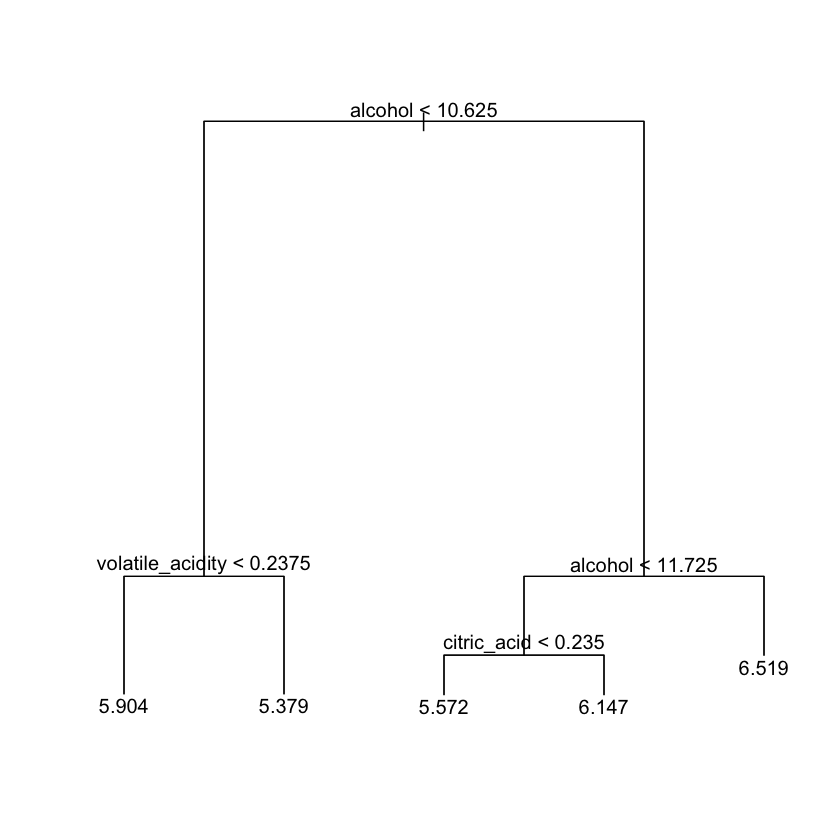

In [9]:
# 나무 시각화
plot(Model_tree)
text(Model_tree)

## 4-5-1. 편향성의 문제
- 어떤 문제가 있는가?
> - Train Set에서 60%를 뽑아와서 나무를 그리고, 또 한 번 60%를 뽑아서 나무를 그리는 과정을 4번 반복한 걸 시각화함 (아래 시각화 참조)
> - Train Set의 60%를 어떤 식으로 뽑아오는지에 따라서 나무의 구조가 바뀐다.
> - 어떻게 뽑는지에 따라서 나무의 구조가 많이 바뀌지 않았으면 좋겠다 (Overfitting이 일어나지 않도록).
- 앙상블의 관점에서 보면, 뽑아 왔을 때 나무가 그려지는 형상이 많이 다양했으면 좋겠다.
> - __그런데 네 개의 나무는 다양하지 않은 쪽에 가깝다.__
> - 첫 번째 split에서 alcohol, 두 번째는 alcohol, volatile_acidity 로 나뉜다.
> - 나무들이 너무 비슷하다는 것!

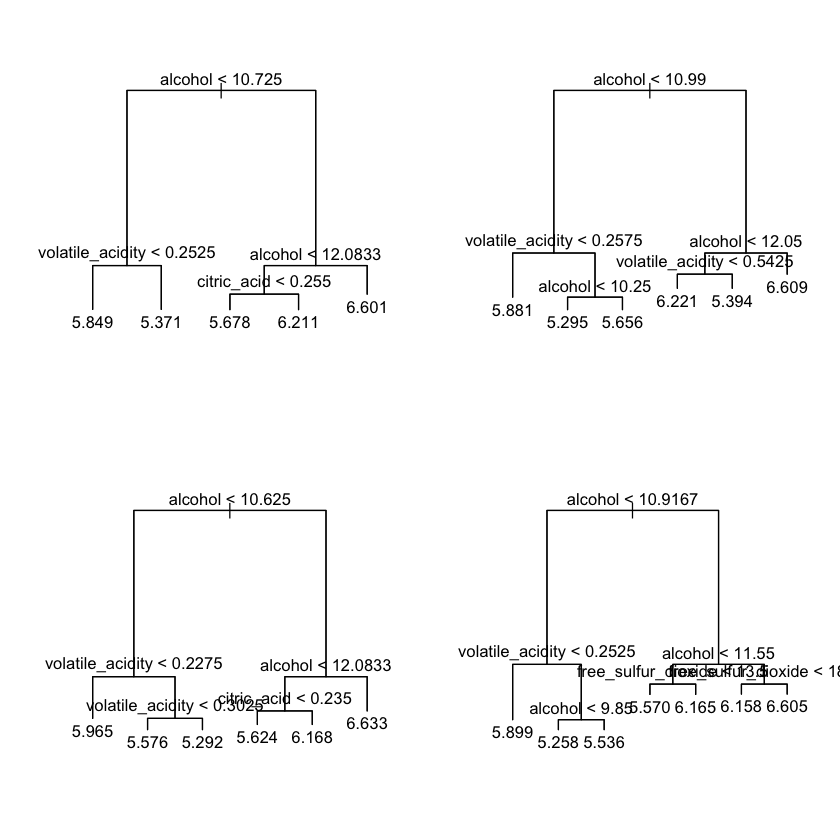

In [10]:
par(mfrow=c(2,2))
for (i in 1:4){
    id <- sample(1:nrow(Train_set), 0.6*nrow(Train_set))
    Model <- tree(quality~., data = Train_set[id,])
    plot(Model)
    text(Model)
}

## 4-5-2. 비슷하게 그려지는 나무들
- 비슷하게 그려지는 나무들을 어떤 식으로 인위적으로 다양성을 나타낼 수 있게끔 조절을 해줄 것인가?
> - 왜 그렇게 비슷하게 그려지는가?
>> - 전체 데이터를 가장 잘 설명하는 input이 alcohol이기 때문에, 60%를 뽑아온들 그 사실 자체가 변하는 건 아니라는 소리다.
>> - 여전히 60% 집합 아래서 가장 설명력이 좋은 input은 alcohol이다.
>> - 그렇기 때문에 우리가 60%로 여러 번 뽑아왔음에도 불구하고, 첫 번째 Split이 다 alcohol로 나뉘는 것이다.
>> - 1~12번째 input에 대해서 다 계산을 해보고, alcohol로 나눴을 때, Training Error가 가장 낮아지기 때문에 나누는 것...
>> - input 변수 12개를 다 고려하면, 그중에서 alcohol이 가장 월등할 수 밖에 없기 때문에 alcohol로 나뉘는 게 논리적으로 타당할 수 있다.
>> - 허나 우리가 원하는 건, 첫번째 split이 alcohol이 아녔으면 좋겠다. 모두 다 alcohol이면 너무 다양성이 없기 때문이다.

## 4-5-3. 다양성을 담보하기 위한 노력,  Random Forest
- 그러면 어떻게 나무들의 형태 다양성을 담보할 수 있을까?
> - 모든 Input에 대해서 Training Error를 다 계산하지 말고, 그 중에서 랜덤하게 30%정도만 고려하자는 것
>> - 12개의 input 변수 중에서 4개의 input을 랜덤하게 뽑아서, 그 4개의 변수 중에서 가장 설명을 잘 하는 변수로 나누자는 것.
>> - alcohol이 4개에 포함되지 않을 확률 : 8/12
>> - alcohol로 나뉘지 않을 가능성이 더 높아졌다.
>> - 이런 식으로 강제할 수 있다.
>> - 12개 중에서 4개를 고려해서 그 4개 중에서 제일 설명을 잘 하는 변수로 나눈다.
>> - 그렇게 해서 계속 랜덤하게 해나가는 것.
>> - 이런 규칙을 통해서 만든 나무들로 숲을 이루자는 것.
>> - 그게 바로 __Random Forest__

- alcohol로 나누지 못하게 강제했다면
> - 그렇게 만들어진 나무는, 강제하지 않았을 때 만든 나무보다 더 안 좋은 예측력을 갖는다.
> - 그럼에도 불구하고 더 안 좋은 나무들을 모았을 때의 예측력은 좋은 나무 모델을 모았을 때의 나무보다 더 좋은 결과를 낸다.
> - 성능 : 후진 나무 500개  > 좋은 나무 500개

## 4-5-4. Random Forest의 Hyperparameter
- 12개 중에서 4개를 주사위를 굴려서 임의로 뽑는다
> - 12개 중에서 12개를 뽑는 건 Bagging이다.
> - 왜 4개를 뽑느냐? 5개를 뽑을 수도 있고, 6개를 뽑을 수도 있는데...
> - 얘네가 바로 Hyperparameter다.
- 4개로 두고 Random Forest를 만들어서 Validation Error를 재고, 또 5개로 뒀을 때 Random Forest를 만들어서 Validation Error를 재고... 그 과정을 1~12까지 다 해야된다(이론적으로). 나무가 500개니까 12번을 계산하겠다는 소리는 6,000번을 하겠다는 소리다.
- 모든 Hyperparameter에 대해서 Validation Error를 계산해보고, Validation Error가 가장 낮아지는 mtry로 나누자.
- 그게 Cross Validation이다.

In [11]:
##### install packages (randomForest)
# install.packages("randomForest")

##### 1. Data Load

Train_set <- read.csv('./data/Train_set.csv')
Test_set <- read.csv('./data/Test_set.csv')

##### 2. Setting
set.seed(1023)
tr <- sample(1:nrow(Train_set), 0.7*nrow(Train_set))
rqv <- Train_set$quality[-tr]


##### 3. Linear Regression
Model_lm <- lm(quality ~., data = Train_set[tr, ])
pqv_lm <- predict(Model_lm, Train_set[-tr, ])
mean((rqv - pqv_lm)^2)

##### 4. Decision Tree
library(tree)
Model_tree <- tree(quality ~., data = Train_set[tr, ])
pqv_tree <- predict(Model_tree, Train_set[-tr, ])
mean((rqv - pqv_tree)^2)

##### 5. randomForest ...
library(randomForest)
Model_rf <- randomForest(quality ~. ,
                         data = Train_set[tr, ],
                         mtry = 4)
pqv_rf <- predict(Model_rf, Train_set[-tr, ])
mean((rqv - pqv_rf)^2)


[1] 0.5154747

[1] 0.5463322

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.


[1] 0.3698475

## 4-5-5. mtry 세팅

In [12]:
Model_rf


Call:
 randomForest(formula = quality ~ ., data = Train_set[tr, ], mtry = 4) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 4

          Mean of squared residuals: 0.3965719
                    % Var explained: 48.49

In [13]:
##### 5. randomForest ... 1
Model_rf_1 <- randomForest(quality ~. ,
                         data = Train_set[tr, ],
                         mtry = 1)
pqv_rf_1 <- predict(Model_rf_1, Train_set[-tr, ])
mean((rqv - pqv_rf_1)^2)


##### 5. randomForest ... 3
Model_rf_3 <- randomForest(quality ~. ,
                         data = Train_set[tr, ],
                         mtry = 3)
pqv_rf_3 <- predict(Model_rf_3, Train_set[-tr, ])
mean((rqv - pqv_rf_3)^2)


##### 5. randomForest ...5
Model_rf_5 <- randomForest(quality ~. ,
                         data = Train_set[tr, ],
                         mtry = 5)
pqv_rf_5 <- predict(Model_rf_5, Train_set[-tr, ])
mean((rqv - pqv_rf_5)^2)


##### 5. randomForest ... 7
Model_rf_7 <- randomForest(quality ~. ,
                         data = Train_set[tr, ],
                         mtry = 7)
pqv_rf_7 <- predict(Model_rf_7, Train_set[-tr, ])
mean((rqv - pqv_rf_7)^2)

##### 5. randomForest ... 9
Model_rf_9 <- randomForest(quality ~. ,
                         data = Train_set[tr, ],
                         mtry = 9)
pqv_rf_9 <- predict(Model_rf_1, Train_set[-tr, ])
mean((rqv - pqv_rf_9)^2)

[1] 0.4170386

[1] 0.3708887

[1] 0.3696508

[1] 0.3719003

[1] 0.4170386

## 4-5-6. ranger & hyperparameter tuning
- ranger
> - A Fast Implementation of Random Forests

In [14]:
# install.packages("ranger")

library(ranger)

Model_rgr <- ranger(quality ~. ,
                         data = Train_set[tr, ],
                         mtry = 12, # RF에서 고려해야할 hyperparameter 튜닝은 요거 하나다.
#                          num.trees = 1000,
#                          min.node.size = 3
                   )
pqv_rgr_1 <- predict(Model_rgr, Train_set[-tr, ])$predictions # 다른 패키지와는 조금 다른 독특한 문법
mean((rqv - pqv_rgr_1)^2)


Attaching package: ‘ranger’

The following object is masked from ‘package:randomForest’:

    importance



[1] 0.372672

- Parameter의 값을 계속해서 Validation Error를 확인해가면서 바꾸어가는 과정을 Hyperparameter를 Tuning 한다고 얘기한다.
- Hyperparameter와 Model의 선택은 Cross Validation으로 한다.
- 여러 개의 모델을 만드는 것 자체가 Hyperparameter다.

#### RandomForest에서 Hyperparameter를 설정할 수 있는 게 mtry 뿐이라면 Customizing할 수 있는 선택지가 많지 않다는 뜻이다.
#### 그러나 Boosting Model은 선택지가 많다.
- Hyperparameter를 정교하게 튜닝하면 RF보다 나은 성능을 얻을 수 있지만, 과정이 더 힘들다.
- 그래서 RF를 쓰는 걸 더 추천한다.
- __RandomForest가 왜 좋은가?__
> - 수식적인 해설?

- extremely randomized trees vs random forest

## 4-5-7. Boosting
- 부스팅도 수백 수천 가지의 모델을 합치는 것
> - RF는 (첫 번째 나무와 두 번째 나무를 만들 때)과정 사이에 연관성이 없었다. 개별적(병렬적)으로 뽑은 것이다.
> - 그런데 Boosting은 첫 번째 나무를 만들고, 두 번째 나무를 만들 때, 첫 번째 나무에서 얻은 정보를 사용해서 만든다. 세 번째 나무를 만들 때는 첫 번째와 두 번째 나무에서 얻은 정보를 가지고 만드는데 계속해서 직렬적으로 만드는 것이다.
- 이것도 마찬가지로 앙상블의 기법 중에 하나인데...
> - 앙상블에는 Bagging이라는 개념도 있고, Boosting이라는 개념도 있는데 (지금은) 의사결정나무들에 Bagging과 Boosting을 적용해보는 작업을 하는 것이다. 
> - 의사결정나무에 Bagging이라는 테크닉을 적용할 때, Split할 때 랜덤하게 고르는 하나의 테크닉을 추가하면 Random Forest로 부르기로 하고...
> - Boosting에 여러 가지가 있는데, 모든 Boosting Model은 이전에 만들어졌던 모델들의 정보를 가지고 다음 모델을 만든다는 것이다.


- 모든 Boosting 모델은 이전에 만들었던 모델을 참고해서 만든다.
> - ex) 유치원생 20명 포유류/조류 분류하는 모델
> - Weak Learner로부터 Strong Learner를 만드는 방법이 Boosting이다.
>> - 잘못 분류된 샘플에 가중치를 줘서 학습
>> - 이게 바로 Ada Boost

- Boosting Model을 쓸 때, 유의사항
> - 1) Weak Learner
>> - 시작할 때, Weak Learner로 시작하는 게 중요하다.
>> - Strong Learner를 Base로 쓰면 성능 자체가 안 좋다.
>> - 유치원생 만 명보다 대학생 한 명의 성능이 좋지 않다.
> - 2) Learning Rate (학습 속도, 학습 능률)
>> - 첫번째 유치원생이 예측을 했고, 그걸 두번째 유치원생에게 알려줘야하는데 어느 정도의 중요도로 알려줄 것인지에 대한 것
>> - 일반적으로 낮게하면 할수록 좋다.
>> - 첫번째 애가 실수한 걸, 두번째 애에게 약하게 알려주는 게 성능이 좋다.
>> - 천천히 배워야 더 잘 안다?

- Boosting 사용할 때 사용하는 나무들의 깊이는 깊으면 안 된다. (2시간 7분)
> - 나무의 최대 깊이를 parameter로 제한해야한다.
> - 1) y = f1(x) + e
>> - e(error): x가 f1으로 설명하지 못하는 y의 나머지 부분
> - 2) y - f1(x) = f2(x)
>> - y - f1(x)는 output 1 ... f1(x)에 0.01을 곱해준다 ... 이걸 learning_rate라 함
>> - 첫번째 모델이 얼마나 잘못하고 있는지 두번째 모델에 알려주는 상수가 얘가된다?
>> - 0.01을 곱했다는 건 조금만 빼겠다는 것이다. 첫번째 모델이 설명하는 Y의 부분을 조금만 빼서 그걸 f2한테 예측하게 시키는 것이다.
>> - 일반적으로 작게 만들면 작게 만들수록 모델의 성능이 나아지는 경향을 보인다.
>> - 얘를 작게 만들면 이 과정을 많이 해야할까? 적게 해야할까?
>> - 많이 데려와야 한다.
>> - 너무 작게 잡으면 계산 시간이 너무 오래 걸린다.
> - 3) y - f1(x) - f2(x) = f3(x)
>> - y - f1(x) - f2(x)는 output 2


## 4-5-8. GBM (Gradient Boosting Model)
- Boosting 모형을 만들어주는 패키지 중 하나 (2시간 10분)
- GBM의 Hyperparameter
> - learning_rate
> - n.trees
> - 등등 ... ?

In [15]:
# install.packages("gbm")

library(gbm)

Model_gbm <- gbm(quality ~. ,
                 data = Train_set[tr, ],)

pqv_gbm <- predict(Model_gbm, Train_set[-tr, ])
mean((rqv - pqv_gbm)^2)

Loading required package: survival
Loading required package: lattice
Loading required package: splines
Loading required package: parallel
Loaded gbm 2.1.3


Distribution not specified, assuming gaussian ...


ERROR: Error in paste("Using", n.trees, "trees...\n"): 기본값이 없는 인수 "n.trees"가 누락되어 있습니다


- gbm은 우리가 예측할 때, 몇번 째 나무까지 쓸 것인지 명시해달라고 함
- RF에서는 일정 갯수 이상의 나무를 쓰면 성능이 좋아지거나 나빠지지 않는다.
> - 예를 들어, 100개를 썼더니 좋았는데 500개를 썼다고 엄청 좋아지지는 않는다.
> - 근데 그게 나빠지지도 않는다.
> - 나무가 많아지면 숲이 울창해진다.
> - 그러면 모델이 더 복잡해진다고 생각할 수도 있다.
> - 모델이 복잡해지면 Overfitting이 발생한다.
> - 그래서 RF를 만들면 RF에서 사용하는 나무들의 갯수들이 많으면 많을수록 Overfitting이 발생할 수도 있지 않겠느냐라고 물어볼 수도 있는데 그렇지 않다.
> - RF는 나무를 아무리 많이 써도 Overfitting이 발생하지 않는다.
- 그런데 Boosting은 다르다.
> - 나무를 만들어 나가는 단계를 특정 단계 이상 반복하게 되면 Overfitting이 발생한다.
> - 그래서 예측을 할 적에 나무를 몇 개를 써달라는 부탁을 하는 것이다.

- 그러면 나무의 갯수를 지정해서 Error를 확인해보자

In [16]:
# install.packages("gbm")

library(gbm)

Model_gbm <- gbm(quality ~. ,
                 data = Train_set[tr, ],
                 n.trees = 1000)

pqv_gbm <- predict(Model_gbm, Train_set[-tr, ], n.trees=1000)
mean((rqv - pqv_gbm)^2)

Distribution not specified, assuming gaussian ...


[1] 0.6098811

## 4-5-8-1. learning_rate Problem
- 부스팅 모형의 성능이 심지어 회귀모형보다 안좋다. 도대체 무슨 문제가 발생한 걸까?
- Validation Error와 Training Error를 계산해서 두 개의 차이가 얼마 안 나고 둘 다 높으면 Underfitting이다.
- 근데 Training Error는 한참 낮은데 Validation Error가 엄청 높으면 그때 Overfitting이 일어났다고 진단할 수 있다.
- 여기서는 Underfitting이 발생했다.

- Validation Error, Training Error 둘다 높으면 Underfitting이 발생한다.
> - 우리가 만든 모델이 training_set 조차 제대로 설명하지 못했다.

- 왜 그런 일이 발생했느냐?
> - 허접한 유치원생이 다음 유치원생에게 피드백하지 않았다. 그래서 문제가 발생
>> - learning rate를 여기에서는 shrikage라고 표현하는데, shrinkage 값이 0.001로 설정이 되어있는 것이다.
>> - 그 말인즉슨, 첫 번째 유치원생이 틀린 결과를 두 번째 유치원생한테 알려줘야 되는데 그걸 거의 안 알려준 것이다.
>> - 그래서 허접한 유치원생 만명이 모여봤자 결과가 회귀모형이 안 좋은 것이다.
>> - 우리가 해야할 건, 첫 번째 유치원생이 얼마나 잘못했는지를 두 번째 유치원생에게 알려주는 learning_rate를 조정하면 될 것 같다. 

## 4-5-9. shrinkage

In [17]:
library(gbm)

Model_gbm <- gbm(quality ~. ,
                 data = Train_set[tr, ],
                 n.trees = 1000,
                 shrinkage = 0.1)


pqv_gbm <- predict(Model_gbm, Train_set[-tr, ], n.trees=1000)
mean((rqv - pqv_gbm)^2)

Distribution not specified, assuming gaussian ...


[1] 0.4905075

- 회귀모형보다 좋아지지만, 더 좋게 하려면 나무의 갯수를 늘려보자

In [18]:
library(gbm)

Model_gbm <- gbm(quality ~. ,
                 data = Train_set[tr, ],
                 n.trees = 4000,
                 shrinkage = 0.1)


pqv_gbm <- predict(Model_gbm, Train_set[-tr, ], n.trees=4000)
mean((rqv - pqv_gbm)^2)

Distribution not specified, assuming gaussian ...


[1] 0.4924252

- 나무를 4000개로 늘려봤자, 예측력이 그게 그거다.
- 즉 shrinkage가 높다는 뜻!
- hyperparameter를 조정해야 한다!

In [19]:
library(gbm)

Model_gbm <- gbm(quality ~. ,
                 data = Train_set,
                 n.trees = 4000,
                 shrinkage = 0.01)

pqv_gbm <- predict(Model_gbm, Train_set[-tr, ], n.trees=4000)
mean((rqv - pqv_gbm)^2)

Distribution not specified, assuming gaussian ...


[1] 0.464148

- 줄긴 줄었다.
- 되게 까다롭다.
- 그래서 Boosting 모델을 가지고 뭔가 좋은 결과를 뽑아내려면 이 과정을 되게 많이 해야 한다.
- hyperparameter들을 조정해가면서 어떨 때 성능이 가장 좋게 나오겠느냐... 이 튜닝 과정이 굉장히 지루하다.


- 중요한 건, Boosting Model을 쓸 때는 나무를 몇 개 쓸 건지가 굉장히 중요한데 그걸 하나하나 튜닝해주기 굉장히 불편하다.
- 그래서 패키지에서 지원해준다.

## 4-5-10. Cross Validation Folds
- 2시간 23분

In [20]:
Model_gbm <- gbm(quality ~. ,
                 data = Train_set,
                 n.trees = 4000,
                 shrinkage = 0.01,
                 cv.folds = 5)

Model_gbm
# pqv_gbm <- predict(Model_gbm, Train_set[-tr, ], n.trees=4000)
# mean((rqv - pqv_gbm)^2)

Distribution not specified, assuming gaussian ...


gbm(formula = quality ~ ., data = Train_set, n.trees = 4000, 
    shrinkage = 0.01, cv.folds = 5)
A gradient boosted model with gaussian loss function.
4000 iterations were performed.
The best cross-validation iteration was 4000.
There were 12 predictors of which 11 had non-zero influence.

In [21]:
Model_gbm <- gbm(quality ~. ,
                 data = Train_set,
                 n.trees = 4000,
                 shrinkage = 0.1,
                 cv.folds = 5)

Model_gbm
# pqv_gbm <- predict(Model_gbm, Train_set[-tr, ], n.trees=4000)
# mean((rqv - pqv_gbm)^2)

Distribution not specified, assuming gaussian ...


gbm(formula = quality ~ ., data = Train_set, n.trees = 4000, 
    shrinkage = 0.1, cv.folds = 5)
A gradient boosted model with gaussian loss function.
4000 iterations were performed.
The best cross-validation iteration was 1228.
There were 12 predictors of which 12 had non-zero influence.

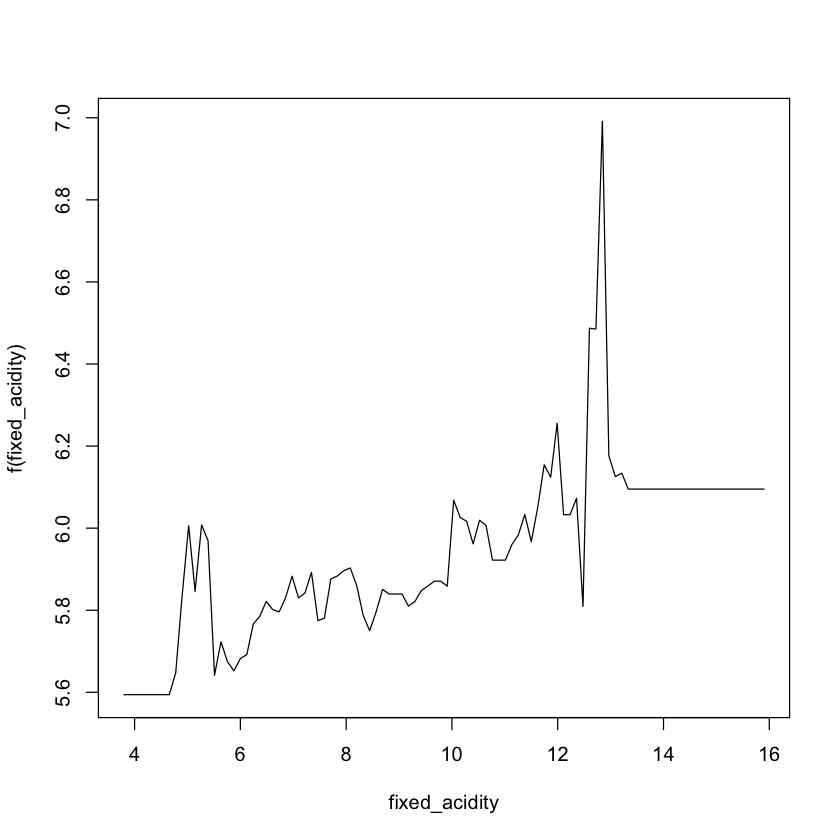

In [22]:
plot(Model_gbm)

- 2시간 30분
> - 숫자를 조금씩 바꿔가면서 어떻게 되는지 관찰하면서
> - 마지막에 test를 함

# 5. Bias - Variance
- (2시간 32분)

- test_error가 0.7 이었다면...분해할 수 있다.
> - 에러가 왜 발생했는지 3가지 요인으로 나눌 수 있다.
>> - 0.7 = 0.2 + 0.3 + 0.2 이런 식으로!
> - 1~3번째에 기인하는 error
>> - 1) Bias에 기안한 error
>> - 2) Variance에 기인한 error
>> - 3) Irreducible error
>>> - Data 자체에 랜덤성을 띤 error

- 우리가 관측한 에러가 0.7 이지만, 이유를 추적해보자면, 3가지의 원인이 있다는 것.
- Bias
>> - 10만 개의 Sample이 모집단이라면, 
>> - 모집단에 1% Sample을 뽑아서(train_set) 1차 함수 모델을 만든다면...
>> - 또 다르게 1%를 뽑아서 또 한 번 1차함수 모델을 만든다면, 조금은 다르겠지만 비슷하게 나온다.
>> - 선택한 모델이 실제 관계와 다르다.
>> - 그 차이를 얘기하고 있는 양이 Bias
>> - 모델 자체가 얼마나 틀렸는지 나타내는 게 bias
>> - bias는 모델이 단순하다는 것

- Variance(분산)
>> - 10만 개의 모집단에서 4개를 뽑아와서 3차 함수를 학습시킨다면 정확히 한번씩 지나는 함수가 만들어질 것이다.
>> - 또 다르게 뽑아온다면, 함수의 생김새 자체가 달라져 버린다.
>> - 어떤 식으로 Train_set을 뽑아오는지에 따라서 모델이 얼만큼 민감하게 반응하는지를 나타내는 척도
- Model이 Train_set에 얼마나 민감한지 나타내는 척도가 Variance
- Model 자체가 얼마나 틀렸는지를 나타내는 척도가 Bias

- Overfitting은 왜 일어나는가?
> - Variance가 높아서 발생하는 문제
> - 분산이 크다는 건, 불안정하다는 얘기
> - Train Set을 어떤 식으로 뽑아오는지에 따라서 심각하게 영향을 받는다.

- Bias가 크면 모델 자체가 단순하다는 뜻

- irreducible 
> - 우리가 관측하지 못한 y에 영향을 미치는 변수들
> - 우리가 얼마나 x와 y의 관계를 추정해든지 간에
> - (그런 변수들이 우리한테 없기 때문에 필연적으로) 반드시 존재할 수 밖에 없는 에러다.

- reduceble error
> - 충분히 줄일 수 있는 에러
>> - Bias와 Variance

- Capacity가 낮은 모델은...
> - Bias가 높고, Variance가 낮음
> - Train Set을 어떤 식으로 뽑아오든지 간에 거기에 1차 함수 모형을 학습시키고자 한다면, 모델 자체가 크게 달라지지 않을 것.
> - 1차 함수는 Bias는 높지만, Variance는 낮다.
>> - 다만 데이터가 충분히 많아진다면 1000차함수는 모델의 실제 관계를 거의 정확하게 근사할 수 있다.
>> - 그래서 Bias가 낮다고 한다. 그래서 1000차 함수는 Bias가 낮고, Variance가 높다고 한다.

- obj : Generalization Error 제일 줄여주는 모델을 찾고 싶었음
> - Bias에 기인한 Error + Variance에 기인한 Error를 최소화 시키는 모형을 찾고 싶다는 것
>> - 너무 간단한 모형 : 
>> - 너무 복잡한 모형 : 
>> - 두 개의 합은 줄어들다가 늘어나는 Point가 있다는 소리
>> - 그래서 그 Point가 가장 적절한 capacity를 말하는 그 지점이 Bias와 Variance의 합을 가장 많이 낮추는 포인트가 될 거라는 소리.

- Random Forest에 있어서 Bias와 Variance의 식이 어떻게 될 것인지에 대한 이야기

- 우리가 여태까지 했던 건 회귀문제(Regression Problem)

- 4번째 시간, 분류 문제(Classification Problem)
> - 정성적인 정보를 예측하는 문제
> - Regression problem하고 거의 비슷함
> - 어떤 식으로 Regression Model을 Classification Model로 확장할 수 있겠는가

- 5번째 시간, 신경망 모델


- gradient descent
- ppt 2회차

- regularization
- for 문
- xgBoost
- caret

## Regualization
- Training Set에 지나치게 민감한데
- 모델의 Capacity가 높은데 ...
- 트레이닝 셋에 민감하지 않으면 좋다.

## XgBoost

## caret

In [ ]:
library(caret)

cv_2 <- trainControl(method = "cv", number = 5)

cv_fits <- train(quality ~., data = Train_set,
                 method = "ranger", trControl)

## Random Forest에 있어서 Bias와 Variance의 식이 어떻게 될 것인지